In [111]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from src.medidas_desempeno_biclase import calcula_medidas_biclase
from src.ROC_AUC import imprime_ROC_AUC

In [112]:
df = pd.read_csv('data/df_train.csv')
X = df.drop(columns = ['CLASS'])
y = df['CLASS']

### SVM

In [113]:
svm_model = svm.SVC()
cv_vals = [5, 10]
resultados_svm = []

params = {'kernel' : ['rbf'],
    'C': [1, 3],
    'gamma': [0.0001, 0.0002]}

medidas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'ROC_AUC': 'roc_auc'}

for cval in cv_vals:    
    grid = GridSearchCV(
        estimator = svm_model,
        param_grid = params,
        cv = cval,
        scoring = medidas,
        refit = 'ROC_AUC',
        n_jobs = -1)

    grid.fit(X, y)
    resultados_svm.append({
        'cv': cval,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_, 
        'medidas': grid.cv_results_})

/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaco

### KNN

In [114]:
knn_model = KNeighborsClassifier()
cv_vals = [5, 10]
resultados_knn = []

params = {'n_neighbors':[11, 13, 15]}

medidas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'ROC_AUC': 'roc_auc'}

for cval in cv_vals:    
    grid = GridSearchCV(
        estimator = knn_model,
        param_grid = params,
        cv = cval,
        scoring = medidas,
        refit = 'ROC_AUC',
        n_jobs = -1)

    grid.fit(X, y)
    resultados_knn.append({
        'cv': cval,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_, 
        'medidas': grid.cv_results_})

/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaco

In [115]:
df_resultados_knn = pd.DataFrame(resultados_knn)
df_resultados_knn.head()

,cv,best_score,best_params,medidas
0,5,0.941071,{'n_neighbors': 11},"{'mean_fit_time': [0.07121806144714356, 0.0721..."
1,10,0.962500,{'n_neighbors': 11},"{'mean_fit_time': [0.06033236980438232, 0.0779..."


In [116]:
df_resultados_knn.to_csv('data/resultados_knn.csv', index=False)
df_resultados_knn.head()

,cv,best_score,best_params,medidas
0,5,0.941071,{'n_neighbors': 11},"{'mean_fit_time': [0.07121806144714356, 0.0721..."
1,10,0.962500,{'n_neighbors': 11},"{'mean_fit_time': [0.06033236980438232, 0.0779..."


### Dataset pruebas

In [117]:
df_test = pd.read_csv('data/df_test.csv')
X_test = df_test.drop(columns=['CLASS'])
y_test = df_test['CLASS']

### Predicciónes con KNN

In [118]:
y_pred = grid.predict(X_test)
print('tipo de y_pred :', type(y_pred))
print('shape de y_pred :', y_pred.shape)

tipo de y_pred : <class 'numpy.ndarray'>
shape de y_pred : (15,)


### Calcular medidas biclase

In [119]:
calcula_medidas_biclase(y_test, y_pred)

,Medida,Valor
0,Accuracy,0.733333
1,Error Rate,0.266667
2,Recall (Sensitivity),0.600000
3,Specificity,1.000000
4,Balanced Accuracy,0.800000
5,Precision,1.000000
6,F1 Score,0.750000
7,MCC,0.577350


### ROC_AUC

In [130]:
y_pred = grid.predict_proba(X_test)[:,1]

In [131]:
print('tipo de y_pred :', type(y_pred))
print('shape de y_pred :', y_pred.shape)

print('tipo de y_test :', type(y_test))
print('shape de y_test :', y_test.shape)

tipo de y_pred : <class 'numpy.ndarray'>
shape de y_pred : (15,)
tipo de y_test : <class 'pandas.core.series.Series'>
shape de y_test : (15,)


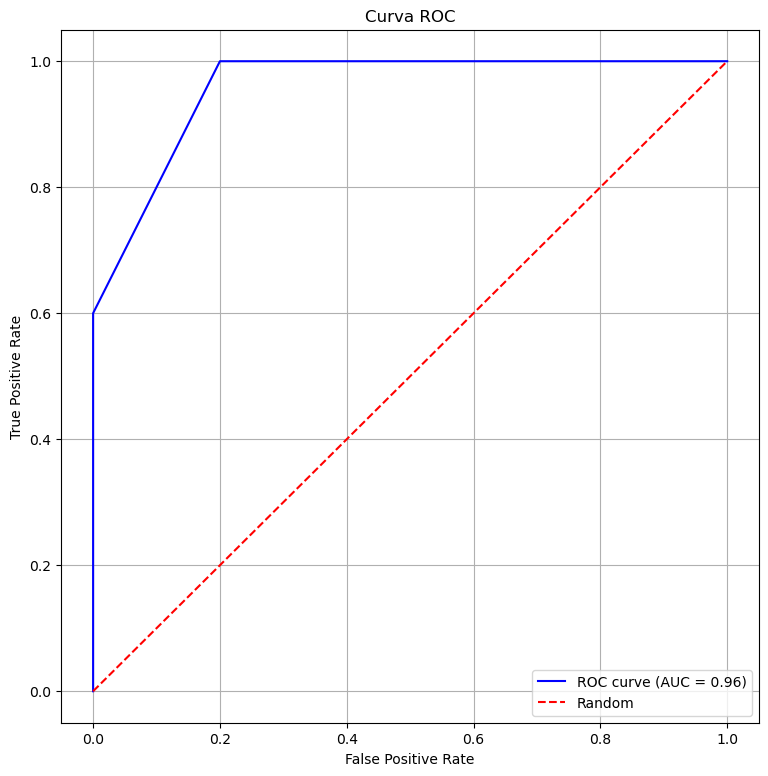

In [132]:
imprime_ROC_AUC(y_test, y_pred)

## sale bien fea porque solamente hay 